# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [1]:
import pandas as pd
dataset =pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
print(dataset.head())

            ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106


In [2]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d')
dataset['Year'] = [t.year for t in pd.DatetimeIndex(dataset['Date'])]
dataset['Month'] = [t.month for t in pd.DatetimeIndex(dataset['Date'])]
dataset['Day']  = [t.day for t in pd.DatetimeIndex(dataset['Date'])]
dataset['DayOfYear'] = dataset['Date'].dt.strftime('%m/%d')

dataset['Data_Value'] = dataset['Data_Value']/10.0
dataset = dataset.sort_values(['ID','Date'])
print(dataset.head())
 

                 ID       Date Element  Data_Value  Year  Month  Day DayOfYear
55067   USC00200032 2005-01-01    TMIN        -2.8  2005      1    1     01/01
55102   USC00200032 2005-01-01    TMAX         6.7  2005      1    1     01/01
112671  USC00200032 2005-01-02    TMAX        12.2  2005      1    2     01/02
112708  USC00200032 2005-01-02    TMIN        -0.6  2005      1    2     01/02
104159  USC00200032 2005-01-03    TMIN         1.1  2005      1    3     01/03


In [3]:
#omit leap year dates from data set
dataset= dataset[~((dataset['Month']==2 )& (dataset['Day']==29))]
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165002 entries, 55067 to 61135
Data columns (total 8 columns):
ID            165002 non-null object
Date          165002 non-null datetime64[ns]
Element       165002 non-null object
Data_Value    165002 non-null float64
Year          165002 non-null int64
Month         165002 non-null int64
Day           165002 non-null int64
DayOfYear     165002 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 11.3+ MB
None


In [4]:
import numpy as np
temp_max_04_14 = dataset[(dataset['Year'] < 2015) & (dataset['Element']=='TMAX')].groupby('DayOfYear').aggregate({'Data_Value':np.max})
temp_min_04_14 = dataset[(dataset['Year'] < 2015) &( dataset['Element']=='TMIN')].groupby('DayOfYear').aggregate({'Data_Value':np.min})

In [5]:
temp_min_15 = dataset[(dataset['Element'] == 'TMIN') & (dataset['Year'] == 2015)].groupby('DayOfYear').aggregate({'Data_Value':np.min})
temp_max_15 = dataset[(dataset['Element'] == 'TMAX') & (dataset['Year'] == 2015)].groupby('DayOfYear').aggregate({'Data_Value':np.max})

In [6]:
broken_min = np.where(temp_min_15['Data_Value'] < temp_min_04_14['Data_Value'])[0]
broken_max = np.where(temp_max_15['Data_Value'] > temp_max_04_14['Data_Value'])[0]

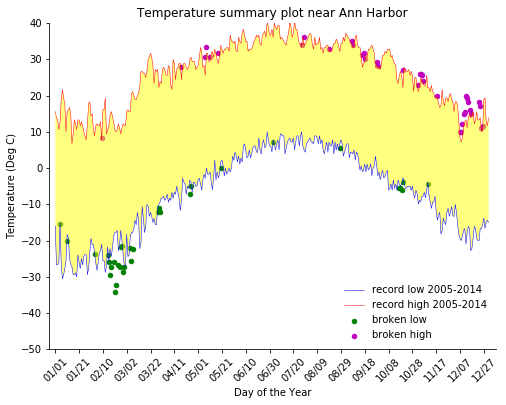

In [14]:

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(temp_min_04_14.values, 'b',lw=0.5, label = 'record low 2005-2014')
plt.plot(temp_max_04_14.values, 'r', lw=0.5,label = 'record high 2005-2014')
plt.scatter(broken_min, temp_min_15.iloc[broken_min], s = 20, c = 'g', label = 'broken low')
plt.scatter(broken_max, temp_max_15.iloc[broken_max], s =20, c = 'm', label = 'broken high')
plt.gca().axis([-5, 370, -50, 40])
plt.xticks(range(0, len(temp_min_04_14), 20), temp_min_04_14.index[range(0, len(temp_min_04_14), 20)], rotation = '45')
plt.legend(loc = 'best', frameon = False)
plt.gca().fill_between(range(len(temp_min_04_14)), temp_min_04_14['Data_Value'], temp_max_04_14['Data_Value'], facecolor = 'yellow', alpha = 0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (Deg C)')
plt.title('Temperature summary plot near Ann Harbor')
plt.show()
fig.savefig('Course-Assignment02.png', dpi=fig.dpi)